# Hamiltonian

The energy of a magnetic system can be computed using Hamiltonian, which consists of different energy terms. In addition, the effective field affects the magnetisation dynamics in the LLG equation (see `dynamics` tutorial).

In this tutorial, we explore different energy terms that can be added to the Hamiltonian.

## Zeeman energy

The Zeeman energy tends to align all magnetic moments parallel to the external magnetic field $\mathbf{H}$, so that the energy density $w_\text{z} = -\mu_{0}M_\text{s}\mathbf{m}\cdot\mathbf{H}$ is minimum, where $\mu_{0}$ is the magnetic constant and $M_\text{s}$ is the magnetisation saturation.

To demonstrate the effect of Zeeman energy we will apply an external magnetic field $H = 10^{6} \,\text{A}\,\text{m}^{-1}$ in the positive $z$ direction to the one-dimensional array of magnetic moments. For the initial magnetisation configuration, we will take the $(1, 0, 1)$ direction with $M_\text{s} = 8 \times 10^{6} \,\text{A}\,\text{m}^{-1}$. 

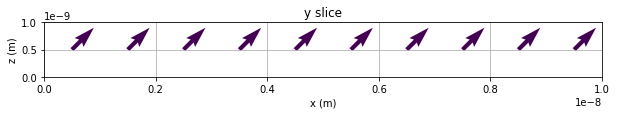

In [1]:
import oommfc as oc
import discretisedfield as df
%matplotlib inline

p1 = (0, 0, 0)
p2 = (10e-9, 1e-9, 1e-9)
cell = (1e-9, 1e-9, 1e-9)
mesh = oc.Mesh(p1=p1, p2=p2, cell=cell)

system = oc.System(name="zeeman")

H = (0, 0, 1e6)  # external magnetic field (A/m)
Ms = 8e6  # saturation magnetisation (A/m)
system.hamiltonian = oc.Zeeman(H=H)
system.m = df.Field(mesh, value=(1, 0, 1), norm=Ms)

system.m.plot_slice("y", 0);

After we defined our system, we can minimize its energy using `MinDriver`.

2017/3/30 10:19: Calling OOMMF (zeeman/zeeman.mif) ... [0.5s]


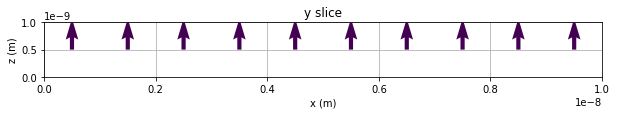

In [2]:
md = oc.MinDriver()
md.drive(system)

system.m.plot_slice("y", 0);

We can see that after applying the magnetic field, all magnetic moments align parallel to $\mathbf{H}$.

**Exercise 1**

Change the direction of applied field to be in the negative $x$ direction and check the minimum energy state.

## Uniaxial anisotropy

Uniaxial anisotropy energy tends to align magnetic moments to be on the anisotropy axis either parallel or antiparallel without a preferred direction. Its energy density is $w_\text{a} = -K(\mathbf{m} \cdot \hat{\mathbf{u}})^{2}$, where $K$ is the anisotropy constant and $\hat{\mathbf{u}}$ is the anisotropy axis.

If our anisotropy axis is in the $(1, 0, 1)$ direction with $K = 6 \times 10^{6} \,\text{J}\,\text{m}^{-3}$ and the initial magnetisation is defined as

$$\mathbf{m} = \begin{cases} (-1, 0, 0) & \text{for } x \le 5 \,\text{nm} \\ (1, 0, 0) & \text{for } x > 5 \,\text{nm} \end{cases}$$

with $M_\text{s} = 8 \times 10^{6} \,\text{A}\,\text{m}^{-1}$.

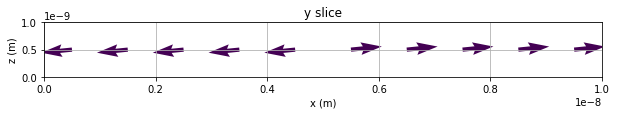

In [3]:
system = oc.System(name="uniaxial_anisotropy")
system.hamiltonian = oc.UniaxialAnisotropy(K=6e6, u=(1, 0, 1))

def m_initial(pos):
    x, y, z = pos
    if x <= 5e-9:
        return (-1, 0, -0.1)
    else:
        return (1, 0, 0.1)

system.m = df.Field(mesh, value=m_initial, norm=Ms)

system.m.plot_slice("y", 0);

2017/3/30 10:19: Calling OOMMF (uniaxial_anisotropy/uniaxial_anisotropy.mif) ... [0.6s]


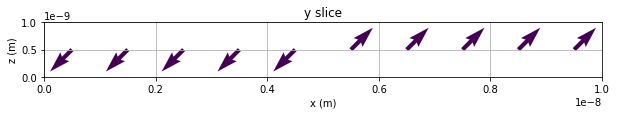

In [4]:
md.drive(system)

system.m.plot_slice("y", 0);

We see that in the relaxed state, all magnetic moments are aligned with the aniostropy axis, without a preferential direction.

## Exchange energy

Previously discussed energy terms (Zeeman and uniaxial anisotropy) are local. More precisely, there are no mutual interactions between different magnetic moments. Exchange energy is not local and tend to align all spins parallel to each other without a preferential direction. Its energy density is $w_\text{ex} = A[(\nabla m_{x})^{2} + (\nabla m_{y})^{2} + (\nabla m_{z})^{2}]$, where $A$ is the exchange energy constant. To demonstrate its effect on the magnetisation configuration, we will use $A = 8 \,\text{pJ}\,\text{m}^{-1}$ on a nonuniform magnetisation configuration from the previous example.

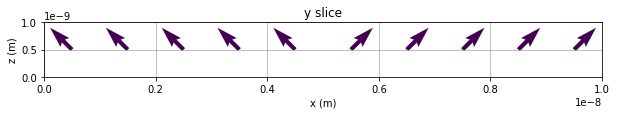

In [5]:
system = oc.System(name="exchange")
system.hamiltonian = oc.Exchange(A=8e-12)

def m_initial(pos):
    x, y, z = pos
    if x <= 5e-9:
        return (-1, 0, 1)
    else:
        return (1, 0, 1)
    
system.m = df.Field(mesh, value=m_initial, norm=Ms)

system.m.plot_slice("y", 0);

2017/3/30 10:19: Calling OOMMF (exchange/exchange.mif) ... [0.5s]


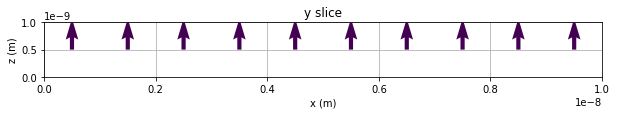

In [6]:
md.drive(system)

system.m.plot_slice("y", 0);

## Dzyaloshinkii-Moriya energy

On the contrary to the exchange energy which tends to align all magnetic moments parallel to each other, Dzyaloshinskii-Moriya (DM) energy wants to align them perpendicular to each other. It energy density is $D[m_{z}\nabla\cdot\mathbf{m} - (\mathbf{m}\cdot\nabla)m_{z}]$, with $D$ being the DM constant. Again, we demonstrate its effect by starting from a non-uniform configuration, with $D = 3\times10^{3} \,\text{J}\,\text{m}^{-2}$.

2017/3/30 10:19: Calling OOMMF (dmi/dmi.mif) ... [0.6s]


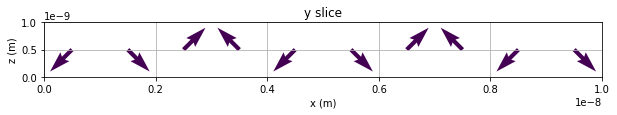

In [7]:
system = oc.System(name="dmi")
system.hamiltonian = oc.DMI(D=3e-3, kind="interfacial")

def m_initial(pos):
    x, y, z = pos
    if x <= 5e-9:
        return (-1, 0, 1)
    else:
        return (1, 0, 1)
    
system.m = df.Field(mesh, value=m_initial, norm=Ms)

md.drive(system)

system.m.plot_slice("y", 0);

## Exchange and Zeeman energies

So far, we investigated the effect of individual energy terms in the Hamiltonian. Now, we look at how multiple energies in the Hamiltoninan contribute to the final magnetisation configuration. We start with the simplest example where only exchange and Zeeman energies are present. As we showed before, exchange energy want to align all magnetic moment parallel to each other without a preferential direction, while Zeeman energy wants them to be parallel to the external magnetic field. Therefore, we can expect that the minimum energy configuration is going to be the uniform state in the direction of applied field $\mathbf{H}$.

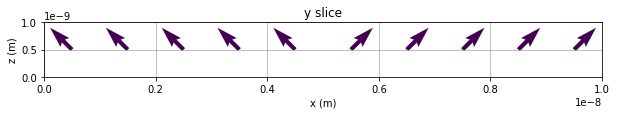

In [8]:
system = oc.System(name="exchange_and_zeeman")
system.hamiltonian = oc.Exchange(A=8e-12) + oc.Zeeman(H=(0, 0, -1e6))

def m_initial(pos):
    x, y, z = pos
    if x <= 5e-9:
        return (-1, 0, 1)
    else:
        return (1, 0, 1)
    
system.m = df.Field(mesh, value=m_initial, norm=Ms)

system.m.plot_slice("y", 0);

2017/3/30 10:19: Calling OOMMF (exchange_and_zeeman/exchange_and_zeeman.mif) ... [0.5s]


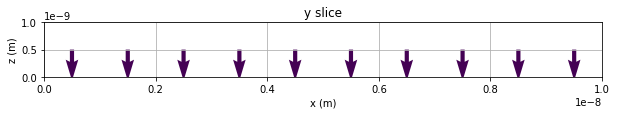

In [9]:
md.drive(system)

system.m.plot_slice("y", 0);

## Dzyaloshinkii-Moriya and exchange

In the previous example, both energies are minimum in the relaxed state. However, if we have Dzyaloshinkii-Moriya energy instead of exchange, none of these two energies will have their minimum.

**Exercise 2**

Relax a one-dimensional chain of magnetic moments of length $L = 20 \,\text{nm}$ with discretisation cell size of $(1 \,\text{nm}, 1 \,\text{nm}, 1 \,\text{nm})$. Hamiltonian consists of:

- exchange energy with $A=1e-11 \,\text{J}\,\text{m}^{-2}$, and
- Dzyaloshinskii-Moriya energy with $D = 4\pi A/L \approx 6.28 \times 10^{3} \,\text{J}\,\text{m}^{-2}$.

The magnetisation saturation is $8 \times 10^{6} \,\text{A}\,\text{m}^{-1}$.

Initialise the system with any uniform state. What is the relaxed state?

## Solutions

**Exercise 1**

2017/3/30 10:19: Calling OOMMF (zeeman/zeeman.mif) ... [0.6s]


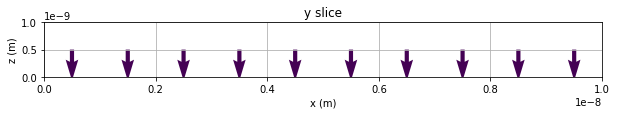

In [10]:
p1 = (0, 0, 0)
p2 = (10e-9, 1e-9, 1e-9)
cell = (1e-9, 1e-9, 1e-9)
mesh = oc.Mesh(p1=p1, p2=p2, cell=cell)

system = oc.System(name="zeeman")

H = (0, 0, -1e6)  # external magnetic field (A/m)
Ms = 8e6  # saturation magnetisation (A/m)
system.hamiltonian = oc.Zeeman(H=H)
system.m = df.Field(mesh, value=(1, 0, 1), norm=Ms)

md = oc.MinDriver()
md.drive(system)

system.m.plot_slice("y", 0);

**Comment**

Show them

```
system.hamiltonian.zeeman.H = (-1e6, 0, 0)
```

and tab completion.

**Exercise 2**

2017/3/30 10:19: Calling OOMMF (exchange_and_dmi/exchange_and_dmi.mif) ... [0.6s]


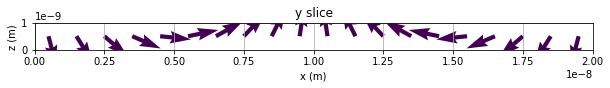

In [11]:
mesh = oc.Mesh(p1=(0, 0, 0), p2=(20e-9, 1e-9, 1e-9), cell=(1e-9, 1e-9, 1e-9))

system = oc.System(name="exchange_and_dmi")
system.hamiltonian = oc.Exchange(A=1e-11) + oc.DMI(D=6.28e-3, kind="interfacial")
system.m = df.Field(mesh, value=(0, 0, 1), norm=8e6)

md = oc.MinDriver()
md.drive(system)

system.m.plot_slice("y", 0);

**Comment**

Explain where does the formula for computing $D$ come from. Helical length:

$$L_\text{D} = 4\pi\frac{A}{D}$$